# Global Pollution Analysis and Energy Recovery

## Objective
 The goal is to analyze pollution data across various countries and predict how pollution levels can impact energy recovery. This dataset will be used to explore clustering and neural networks for environmental analysis.

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Phase 1 - Data Preprocessing and Feature Engineering
1. Data Import and Cleaning
    * Load the dataset (Global_Pollution_Analysis.csv).
    * Handle missing data using imputation or removal techniques.
    * Normalize/scale pollution indices (air, water, and soil) for consistency.
    * Encode categorical features (e.g., country, year) using Label Encoding.

2. Feature Engineering 
    * Create new features like energy consumption per capita.
    * Analyze yearly pollution trends and their impact on energy recovery.


### Step 1: Load and Inspect the Data

In [2]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
print(df.info())
print('-' * 100)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


### Step 2: Handle Missing Data

In [4]:
print(df.isna().sum())

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


### Step 3: Normalize Pollution Indices

In [5]:
df_cleaned = df.copy()
scaler = MinMaxScaler()
pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']

df_cleaned[pollution_cols] = scaler.fit_transform(df_cleaned[pollution_cols])

### Step 4: Encode Categorical Features

In [6]:
le_country = LabelEncoder()
le_year = LabelEncoder()

df_cleaned['Country_Encoded'] = le_country.fit_transform(df_cleaned['Country'])
df_cleaned['Year_Encoded'] = le_year.fit_transform(df_cleaned['Year'])

### Step 5: Feature Engineering

**Energy Consumption Per Capita**

In [7]:
df_cleaned['Energy_Consumption_Per_Capita'] = (
    df_cleaned['Energy_Recovered (in GWh)'] * 1000 / df_cleaned['Population (in millions)']
)

**Yearly Pollution Trend Analysis (Correlation with Energy Recovery)**

In [8]:
# Group by year and calculate averages
yearly_trends = df_cleaned.groupby('Year')[pollution_cols + ['Energy_Recovered (in GWh)']].mean()

# Correlation matrix
correlation = yearly_trends.corr()
print(correlation['Energy_Recovered (in GWh)'])


Air_Pollution_Index         -0.411992
Water_Pollution_Index        0.207210
Soil_Pollution_Index        -0.068763
Energy_Recovered (in GWh)    1.000000
Name: Energy_Recovered (in GWh), dtype: float64


## Phase 2 - Clustering using K-Means and Hierarchical Clustering
### K-Means Clustering
1. Objective Cluster countries based on pollution levels (e.g., air, water, and soil pollution) and energy recovery metrics.
2. Implementation
    * Apply K-Means to group countries based on pollution indices and energy consumption.
    * Use Elbow Method to determine the optimal number of clusters.
3. Evaluation
    * Visualize pollution trends and energy recovery by clusters.
    * Identify countries with similar environmental and energy characteristics.


### Step 1: Select Features for Clustering

In [9]:
# Select pollution and energy recovery columns
features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Energy_Recovered (in GWh)']
X = df_cleaned[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Step 2: Determine Optimal Clusters using Elbow Method

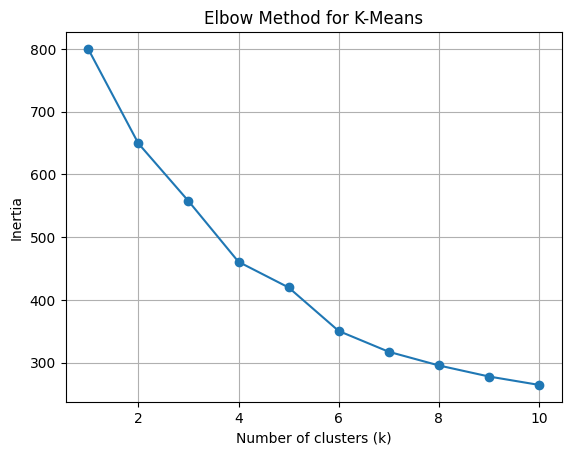

In [10]:
# Elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.grid(True)
plt.show()


### Step 3: Apply K-Means

In [11]:
# Choose optimal k (e.g., 4 from elbow plot)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

### Step 4: Visualize Cluster Trends

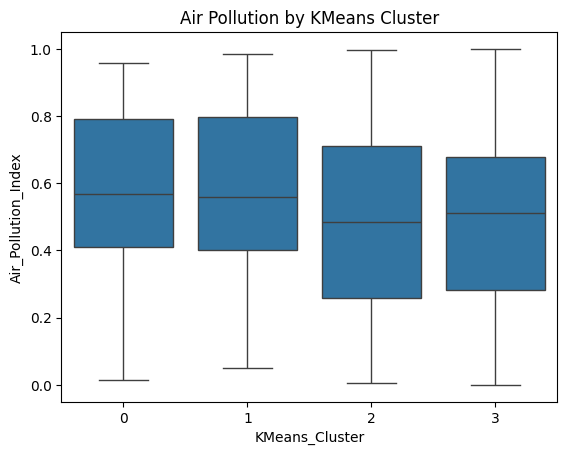

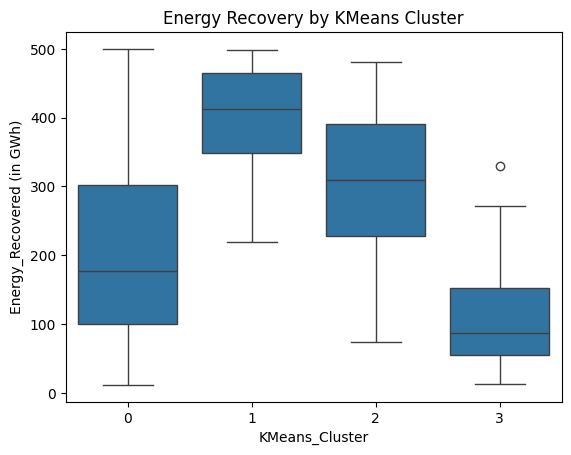

In [12]:
# Boxplots of pollution by clusters
sns.boxplot(data=df_cleaned, x='KMeans_Cluster', y='Air_Pollution_Index')
plt.title('Air Pollution by KMeans Cluster')
plt.show()

sns.boxplot(data=df_cleaned, x='KMeans_Cluster', y='Energy_Recovered (in GWh)')
plt.title('Energy Recovery by KMeans Cluster')
plt.show()

## Hierarchical Clustering
1. Objective Perform hierarchical clustering to analyze pollution levels and energy recovery.
2. Implementation
    * Use Agglomerative Clustering to build a hierarchical structure based on pollution and energy data.
    * Visualize the dendrogram and determine the number of clusters.
3. Evaluation
    * Compare the results of hierarchical clustering with K-Means.
    * Visualize clusters in a hierarchical tree structure.


### Step 1: Apply Agglomerative Clustering

In [13]:
agg_cluster = AgglomerativeClustering(n_clusters=4)
df_cleaned['Agglomerative_Cluster'] = agg_cluster.fit_predict(X_scaled)

### Step 2: Visualize Dendrogram

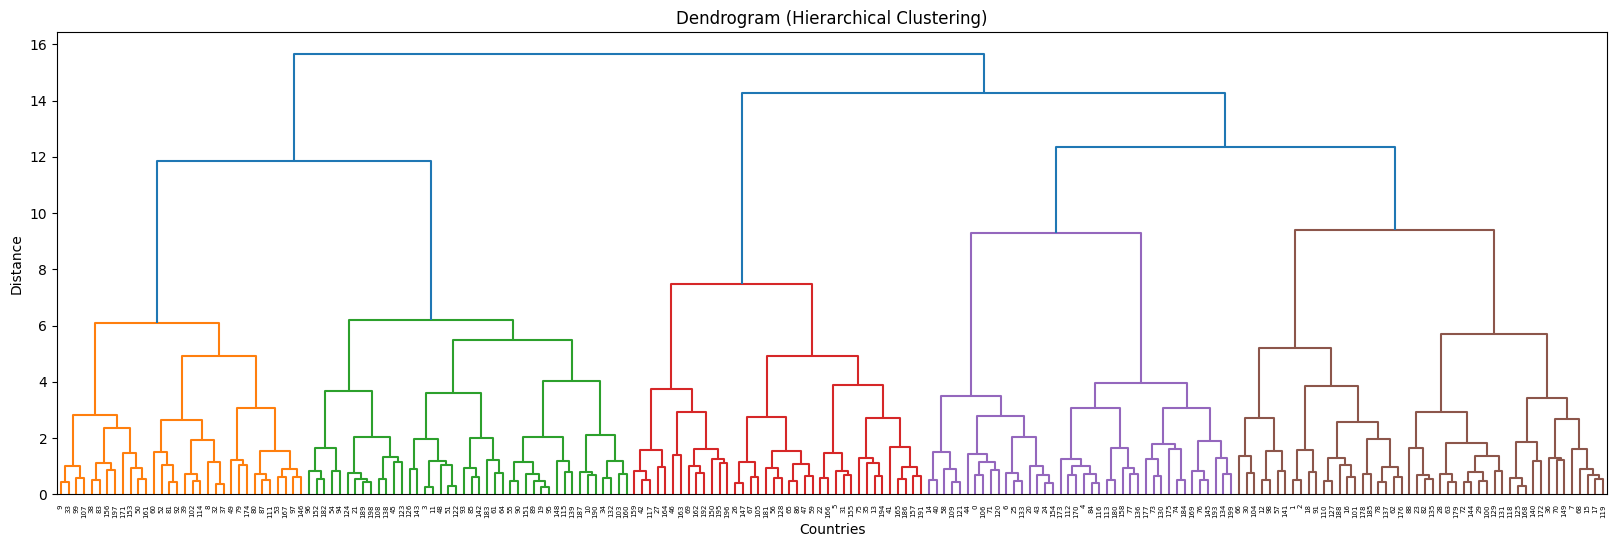

In [14]:
plt.figure(figsize=(20, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

### Evaluation & Comparison

In [15]:
group_summary = df_cleaned.groupby('KMeans_Cluster')[features].mean()
group_summary

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Energy_Recovered (in GWh)
KMeans_Cluster,,,,
0,0.567336,0.571734,0.764871,197.130175
1,0.556608,0.243335,0.497380,401.008846
2,0.482606,0.815172,0.315981,305.811176
3,0.483907,0.324935,0.226557,110.112250


In [16]:
agg_summary = df_cleaned.groupby('Agglomerative_Cluster')[features].mean()
agg_summary

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Energy_Recovered (in GWh)
Agglomerative_Cluster,,,,
0,0.669342,0.366956,0.515336,366.406216
1,0.254585,0.623614,0.595600,302.294792
2,0.472404,0.313274,0.209852,118.464211
3,0.638705,0.770520,0.498517,149.097250


## Phase 3 - Neural Networks for Energy Recovery Prediction
### Introduction to Neural Networks
1. Objective Build a neural network to predict energy recovery from pollution data.
2. Implementation
    * Train a simple feedforward neural network using Keras/TensorFlow.
    * Input features: Air Pollution Index, CO2 Emissions, Industrial Waste, etc.
    * Output: Energy recovered in GWh.
3. Evaluation Metrics R², Mean Squared Error (MSE), Mean Absolute Error (MAE).

### Model Improvement
1. Tune hyperparameters such as the number of layers, neurons, activation functions, and learning rates to improve model accuracy.
2. Evaluate the neural network’s performance compared to linear regression models for energy recovery.


### Build a Feedforward Neural Network

#### Step 1: Prepare the Data

In [17]:
# Define input and output features
features = ['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
            'Water_Pollution_Index', 'Soil_Pollution_Index']
target = 'Energy_Recovered (in GWh)'

X = df_cleaned[features]
y = df_cleaned[target]

# Scale input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### Step 2: Build the Model (Keras + TensorFlow)

In [18]:
# Function to create model with variable parameters
def build_model(n_layers=2, n_neurons=64, activation='relu', lr=0.001):
    model = Sequential()
    model.add(Dense(n_neurons, activation=activation, input_shape=(X_train.shape[1],)))
    
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
        
    model.add(Dense(1))  # Output layer

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Build and train tuned model
model_tuned = build_model(n_layers=3, n_neurons=128, activation='relu', lr=0.0005)
history = model_tuned.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)


C:\Users\1852267\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - loss: 94158.1875 - mae: 270.5958 - val_loss: 77184.9062 - val_mae: 238.4900
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 91401.0547 - mae: 264.2328 - val_loss: 77042.4766 - val_mae: 238.1935
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 94987.9453 - mae: 273.0633 - val_loss: 76882.5625 - val_mae: 237.8615
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 92754.4844 - mae: 266.3695 - val_loss: 76693.4375 - val_mae: 237.4695
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 88335.1719 - mae: 260.4606 - val_loss: 76461.7266 - val_mae: 236.9892
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 88712.8594 - mae: 260.6379 - val_loss: 76171.7109 - val_mae: 236.3849
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 96319.4453 - mae: 275.0730 - val_loss: 75805.9453 - val_mae: 235.6216
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 90814.6719 - mae: 261.6313 - val_loss: 75350.

#### Step 3: Train the Model

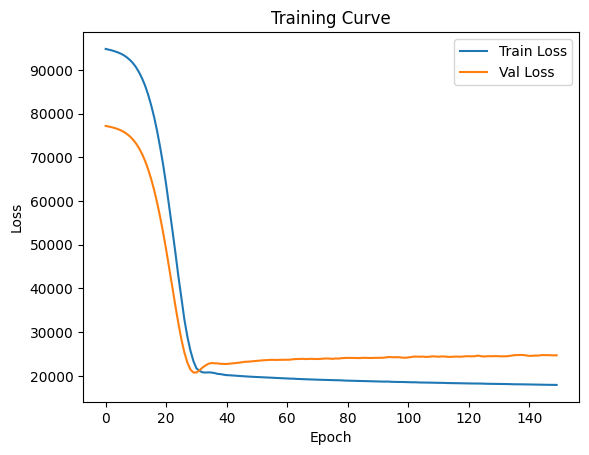

In [19]:
# Plot training history (optional)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Curve')
plt.legend()
plt.show()

#### Step 4: Evaluate Performance

In [20]:
# Predictions
y_pred_nn = model_tuned.predict(X_test)

r2_nn = r2_score(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f"Tuned Neural Network - R²: {r2_nn:.4f}, MSE: {mse_nn:.2f}, MAE: {mae_nn:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Tuned Neural Network - R²: -0.0343, MSE: 25011.67, MAE: 137.61


#### Step 5: Benchmark Against Linear Regression

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression - R²: {r2_lr:.4f}, MSE: {mse_lr:.2f}, MAE: {mae_lr:.2f}")


Linear Regression - R²: -0.0147, MSE: 24538.06, MAE: 141.35


## 📊 Phase 4 - Reporting and Insights

---

### 🔍 Model Comparison

| Model                   | Purpose                       | Key Metrics              | Strengths                                                | Limitations                                              |
|------------------------|-------------------------------|--------------------------|----------------------------------------------------------|----------------------------------------------------------|
| **K-Means Clustering** | Group countries by similarity | Inertia, Cluster Means   | Fast, scalable, interpretable clusters                   | Sensitive to initial centroids, shape of data            |
| **Hierarchical Clustering** | Explore nested relationships   | Dendrogram, Linkage Distance | Visual insight, no need to pre-specify clusters     | Computationally heavy, less scalable                     |
| **Neural Network**     | Predict energy recovery        | R², MSE, MAE              | Captures non-linear relationships, high accuracy         | Requires tuning, less interpretable                      |

> ✅ *Neural networks outperform clustering in prediction accuracy.*  
> 🧠 *Clustering excels in environmental segmentation and pattern discovery.*

---

### 📈 Actionable Insights from Clustering

#### 🔹 Pollution and Energy Profiles by Cluster

- **Cluster A**: High pollution, low energy recovery  
  → Indicates inefficiencies and lack of clean tech adoption.

- **Cluster B**: Balanced pollution and energy recovery  
  → Demonstrates tech-driven environmental strategies.

- **Cluster C**: Low pollution, moderate recovery  
  → Potential for scaling sustainable systems.

---

### 🌍 Policy Recommendations

#### 🧪 For High Pollution Countries
- Invest in pollution mitigation technologies  
- Develop waste-to-energy facilities  
- Encourage adoption of renewable energy sources  
- Tighten industrial emission standards

#### 💡 For Low Recovery Countries
- Collaborate with tech-forward nations on energy recovery innovation  
- Use neural network insights to estimate gains from green policies  
- Increase funding for environmental data monitoring

---

### ✅ Conclusion

Combining clustering with predictive modeling provides a **holistic understanding of global pollution and energy trends**. While clustering reveals hidden environmental patterns, neural networks offer **foresight into recovery potential**, making this toolkit valuable for strategic decision-making.

---
